In [1]:
pip install pandas tensorflow numpy


  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.4-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached markdown-3.8-py3-none-any.whl.metadata (5.1 kB)
  Using cached tensorboard_data_server-0.

In [3]:
import os

base_dataset_path = "D:\Project_DIVI\Dataset-1"
folders = [
    "train_dir",
    "train_single",
    "valid_dir",
    "valid_single",
    "test_dir",
    "test_single"
]

for folder in folders:
    path = os.path.join(base_dataset_path, folder)
    os.makedirs(path, exist_ok=True)
    print(f"Folder dibuat atau sudah ada: {path}")


Folder dibuat atau sudah ada: D:\Project_DIVI\Dataset-1\train_dir
Folder dibuat atau sudah ada: D:\Project_DIVI\Dataset-1\train_single
Folder dibuat atau sudah ada: D:\Project_DIVI\Dataset-1\valid_dir
Folder dibuat atau sudah ada: D:\Project_DIVI\Dataset-1\valid_single
Folder dibuat atau sudah ada: D:\Project_DIVI\Dataset-1\test_dir
Folder dibuat atau sudah ada: D:\Project_DIVI\Dataset-1\test_single


In [10]:
import os
import shutil
import pandas as pd

# Path utama dataset
base_path = r"D:\Project_DIVI\Dataset-1"  # Ganti sesuai path kamu

# Folder utama sumber data
main_folders = ["train", "valid", "test"]

# Folder target sejajar dengan folder utama
target_folders_map = {
    "train": ["train_dir", "train_single"],
    "valid": ["valid_dir", "valid_single"],
    "test": ["test_dir", "test_single"]
}

def get_class(row, classes):
    for c in classes:
        if row[c] == 1:
            return c
    return None

for main_folder in main_folders:
    main_folder_path = os.path.join(base_path, main_folder)
    csv_file = os.path.join(main_folder_path, "_classes.csv")

    if not os.path.isfile(csv_file):
        print(f"File _classes.csv tidak ditemukan di {main_folder_path}, skip.")
        continue

    df = pd.read_csv(csv_file)
    classes = list(df.columns[1:])

    for target_subfolder in target_folders_map[main_folder]:
        target_folder_path = os.path.join(base_path, target_subfolder)
        os.makedirs(target_folder_path, exist_ok=True)

        # Buat folder kelas di folder target
        for kelas in classes:
            kelas_folder = os.path.join(target_folder_path, kelas)
            os.makedirs(kelas_folder, exist_ok=True)

        copied_count = 0
        for idx, row in df.iterrows():
            filename = row['filename']
            kelas = get_class(row, classes)
            if kelas is None:
                print(f"Tidak ada kelas untuk file {filename}")
                continue

            src_file = os.path.join(main_folder_path, filename)
            dst_file = os.path.join(target_folder_path, kelas, filename)

            if os.path.exists(src_file):
                shutil.copy2(src_file, dst_file)
                copied_count += 1
            else:
                print(f"File {filename} tidak ditemukan di {main_folder_path}")
        print(f"[{main_folder} > {target_subfolder}] Berhasil menyalin {copied_count} file ke folder kelas.\n")


[train > train_dir] Berhasil menyalin 1507 file ke folder kelas.

[train > train_single] Berhasil menyalin 1507 file ke folder kelas.

[valid > valid_dir] Berhasil menyalin 108 file ke folder kelas.

[valid > valid_single] Berhasil menyalin 108 file ke folder kelas.

[test > test_dir] Berhasil menyalin 107 file ke folder kelas.

[test > test_single] Berhasil menyalin 107 file ke folder kelas.



In [13]:
import os
import re

# Path dataset
base_path = r"D:\Project_DIVI\Dataset-1"
folder_to_balance = "train_dir"  # Contoh folder

folder_path = os.path.join(base_path, folder_to_balance)

def get_base_name(filename):
    # Ambil bagian sebelum '.rf.' sebagai base name
    # Misal: Motif_Bali_001_jpg.rf.891215ed7be49b6996a3eadb7dcd81fc -> Motif_Bali_001_jpg
    match = re.match(r"(.+?)\.rf\.", filename)
    if match:
        return match.group(1)
    else:
        # Jika pola tidak sesuai, kembalikan nama file tanpa ekstensi
        return os.path.splitext(filename)[0]

if not os.path.exists(folder_path):
    print(f"Folder '{folder_to_balance}' tidak ditemukan.")
else:
    class_folders = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]

    # Kumpulkan grup nama dasar per kelas
    class_groups = {}

    for cls in class_folders:
        cls_path = os.path.join(folder_path, cls)
        files = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))]
        
        groups = {}
        for f in files:
            base_name = get_base_name(f)
            groups.setdefault(base_name, []).append(f)
        class_groups[cls] = groups

    # Hitung jumlah grup per kelas
    group_counts = {cls: len(groups) for cls, groups in class_groups.items()}
    print("Jumlah grup nama dasar per kelas sebelum balancing:")
    for cls, count in group_counts.items():
        print(f"  {cls}: {count}")

    min_groups = min(group_counts.values())
    print(f"\nTarget jumlah grup per kelas setelah balancing: {min_groups}\n")

    # Hapus grup berlebih per kelas
    for cls, groups in class_groups.items():
        if len(groups) > min_groups:
            excess = len(groups) - min_groups
            # Pilih grup untuk dihapus, urut alfabet (bisa diganti random)
            groups_to_delete = sorted(groups.keys())[-excess:]
            
            cls_path = os.path.join(folder_path, cls)
            for grp in groups_to_delete:
                for filename in groups[grp]:
                    file_path = os.path.join(cls_path, filename)
                    if os.path.exists(file_path):
                        os.remove(file_path)
                print(f"{cls}: Menghapus grup '{grp}' ({len(groups[grp])} file)")

    # Hitung ulang grup setelah balancing
    print("\nJumlah grup nama dasar per kelas setelah balancing:")
    for cls in class_folders:
        cls_path = os.path.join(folder_path, cls)
        files = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))]
        groups = set(get_base_name(f) for f in files)
        print(f"  {cls}: {len(groups)}")


Jumlah grup nama dasar per kelas sebelum balancing:
  Bali: 112
  Barat: 93
  Lombok: 96
  Palembang: 98
  Riau: 104

Target jumlah grup per kelas setelah balancing: 93

Bali: Menghapus grup 'Motif_Bali_122_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_123_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_125_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_126_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_129_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_130_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_131_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_132_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_133_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_134_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_135_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_136_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_137_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_138_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_140_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_142_jpg' (3 file)
Bali: Menghapu

In [16]:
import os
import re

base_path = r"D:\Project_DIVI\Dataset-1"
folder_to_balance = "train_single"

folder_path = os.path.join(base_path, folder_to_balance)

def get_base_name(filename):
    match = re.match(r"(.+?)\.rf\.", filename)
    if match:
        return match.group(1)
    else:
        return os.path.splitext(filename)[0]

if not os.path.exists(folder_path):
    print(f"Folder '{folder_to_balance}' tidak ditemukan.")
else:
    class_folders = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]

    class_groups = {}
    for cls in class_folders:
        cls_path = os.path.join(folder_path, cls)
        files = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))]
        
        groups = {}
        for f in files:
            base_name = get_base_name(f)
            groups.setdefault(base_name, []).append(f)
        class_groups[cls] = groups

    group_counts = {cls: len(groups) for cls, groups in class_groups.items()}
    print("Jumlah grup nama dasar per kelas sebelum balancing:")
    for cls, count in group_counts.items():
        print(f"  {cls}: {count}")

    min_groups = min(group_counts.values())
    print(f"\nTarget jumlah grup per kelas setelah balancing: {min_groups}\n")

    for cls, groups in class_groups.items():
        if len(groups) > min_groups:
            excess = len(groups) - min_groups
            groups_to_delete = sorted(groups.keys())[-excess:]
            
            cls_path = os.path.join(folder_path, cls)
            for grp in groups_to_delete:
                for filename in groups[grp]:
                    file_path = os.path.join(cls_path, filename)
                    if os.path.exists(file_path):
                        os.remove(file_path)
                print(f"{cls}: Menghapus grup '{grp}' ({len(groups[grp])} file)")

    print("\nJumlah grup nama dasar per kelas setelah balancing:")
    for cls in class_folders:
        cls_path = os.path.join(folder_path, cls)
        files = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))]
        groups = set(get_base_name(f) for f in files)
        print(f"  {cls}: {len(groups)}")


Jumlah grup nama dasar per kelas sebelum balancing:
  Bali: 112
  Barat: 93
  Lombok: 96
  Palembang: 98
  Riau: 104

Target jumlah grup per kelas setelah balancing: 93

Bali: Menghapus grup 'Motif_Bali_122_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_123_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_125_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_126_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_129_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_130_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_131_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_132_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_133_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_134_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_135_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_136_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_137_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_138_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_140_jpg' (3 file)
Bali: Menghapus grup 'Motif_Bali_142_jpg' (3 file)
Bali: Menghapu

In [17]:
import os

# Base path dataset
base_path = r"D:\Project_DIVI\Dataset-1"  # Sesuaikan dengan path kamu

# Folder baru yang berisi subfolder kelas
folders_to_check = ["train_dir", "train_single", "valid_dir", "valid_single", "test_dir", "test_single"]

def count_images_per_class(base_path, folders):
    for folder in folders:
        folder_path = os.path.join(base_path, folder)
        if not os.path.exists(folder_path):
            print(f"Folder '{folder}' tidak ditemukan.\n")
            continue

        print(f"{folder}:")
        subfolders = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
        if not subfolders:
            print("  (Tidak ada subfolder kelas)\n")
            continue
        
        for subfolder in sorted(subfolders):
            class_folder_path = os.path.join(folder_path, subfolder)
            # Hitung file (asumsi semua file adalah gambar)
            files = [f for f in os.listdir(class_folder_path) if os.path.isfile(os.path.join(class_folder_path, f))]
            print(f"  {subfolder}: {len(files)} images")
        print()  # baris kosong antar folder

count_images_per_class(base_path, folders_to_check)


train_dir:
  Bali: 278 images
  Barat: 279 images
  Lombok: 279 images
  Palembang: 279 images
  Riau: 278 images

train_single:
  Bali: 278 images
  Barat: 279 images
  Lombok: 279 images
  Palembang: 279 images
  Riau: 278 images

valid_dir:
  Bali: 23 images
  Barat: 18 images
  Lombok: 26 images
  Palembang: 27 images
  Riau: 14 images

valid_single:
  Bali: 23 images
  Barat: 18 images
  Lombok: 26 images
  Palembang: 27 images
  Riau: 14 images

test_dir:
  Bali: 11 images
  Barat: 29 images
  Lombok: 24 images
  Palembang: 19 images
  Riau: 24 images

test_single:
  Bali: 11 images
  Barat: 29 images
  Lombok: 24 images
  Palembang: 19 images
  Riau: 24 images



In [24]:
!pip install Pillow
!pip install scipy
!pip install matplotlib
!pip install seaborn

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

base_path = r"D:\Project_DIVI\Dataset-1"
train_dir = os.path.join(base_path, "train_dir")
valid_dir = os.path.join(base_path, "valid_dir")

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data augmentation untuk train
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validasi tanpa augmentasi, hanya normalisasi
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 1393 images belonging to 5 classes.
Found 108 images belonging to 5 classes.


In [2]:
# ======= KODE DEFINISI MODEL DAN TRAINING =======
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
)
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,916,421 (11.13 MB)

 Trainable params: 658,437 (2.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [3]:
EPOCHS = 25

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator
)

print("Training selesai.")

C:\Users\M-SI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2746 - loss: 1.8155

C:\Users\M-SI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.2768 - loss: 1.8097 - val_accuracy: 0.6204 - val_loss: 1.1001
Epoch 2/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.5487 - loss: 1.0944 - val_accuracy: 0.6389 - val_loss: 0.9075
Epoch 3/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.6635 - loss: 0.8446 - val_accuracy: 0.7407 - val_loss: 0.7771
Epoch 4/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.7611 - loss: 0.7042 - val_accuracy: 0.7685 - val_loss: 0.7245
Epoch 5/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 43s 984ms/step - accuracy: 0.7748 - loss: 0.6420 - val_accuracy: 0.7963 - val_loss: 0.6567
Epoch 6/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 43s 968ms/step - accuracy: 0.7907 - loss: 0.5683 - val_accuracy: 0.7870 - val_loss: 0.6527
Epoch 7/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 43s 969ms/step - accuracy: 0.8279 - loss: 0.4890 - val_accuracy: 0.8056 - val_loss: 0.6345
Epoch 8/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8489 - loss: 0.4409 - val_accuracy: 0.7870 - val_loss: 0

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

base_path = r"D:\Project_DIVI\Dataset-1"
test_dir = os.path.join(base_path, "test_dir")

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Preprocessing test data (hanya rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

# Buat test generator dari folder test_dir
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Jangan shuffle agar urutan kelas sesuai
)

# Evaluasi model menggunakan data uji
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Found 107 images belonging to 5 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 686ms/step - accuracy: 0.7445 - loss: 0.6518
Test accuracy: 75.70%


In [9]:
# Simpan model setelah training
model.save(r"D:\Project_DIVI\Dataset-1\mobilenetv2_tenun_model.h5")

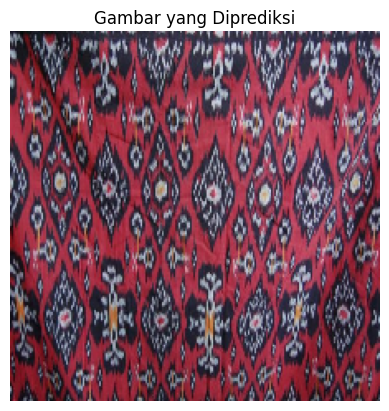

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class : Bali
Accuracy       : 90.45%
Description    : Motif Bali biasanya memiliki pola geometris yang kuat dan warna cerah, melambangkan kekayaan budaya Bali.


In [21]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models
import os

# Muat model
model_path = r"D:\Project_DIVI\Dataset-1\mobilenetv2_tenun_model.h5"
model = models.load_model(model_path)

# Daftar kelas dan deskripsi motifnya
class_info = {
    "Bali": "Motif Bali biasanya memiliki pola geometris yang kuat dan warna cerah, melambangkan kekayaan budaya Bali.",
    "Barat": "Motif Barat dikenal dengan warna natural dan pola floral yang elegan, khas daerah barat Indonesia.",
    "Lombok": "Motif Lombok menampilkan pola abstrak dengan nuansa warna tanah dan biru laut, mencerminkan alam Lombok.",
    "Palembang": "Motif Palembang kaya dengan ornamen khas songket berwarna emas dan merah yang mewah.",
    "Riau": "Motif Riau memadukan pola flora dan fauna dengan warna lembut, melambangkan keindahan alam Riau."
}

# Path gambar baru yang ingin diuji
img_path = r"D:\Project_DIVI\Dataset-1\bali1.jpg"  # Ganti sesuai gambar

IMG_HEIGHT = 224
IMG_WIDTH = 224

# Load dan tampilkan gambar
img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
plt.imshow(img)
plt.title("Gambar yang Diprediksi")
plt.axis('off')
plt.show()

# Preprocess gambar
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediksi
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)
predicted_class = list(class_info.keys())[predicted_index]
predicted_prob = prediction[0][predicted_index]

# Tampilkan hasil
print(f"Predicted Class : {predicted_class}")
print(f"Accuracy       : {predicted_prob*100:.2f}%")
print(f"Description    : {class_info[predicted_class]}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 633ms/step - accuracy: 0.7579 - loss: 0.5337
Validation Loss: 0.5745
Validation Accuracy: 0.7593


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 999ms/step
Classification Report:
              precision    recall  f1-score   support

        Bali       0.18      0.17      0.18        23
       Barat       0.05      0.06      0.05        18
      Lombok       0.43      0.35      0.38        26
   Palembang       0.26      0.26      0.26        27
        Riau       0.35      0.43      0.39        14

    accuracy                           0.25       108
   macro avg       0.25      0.25      0.25       108
weighted avg       0.26      0.25      0.25       108



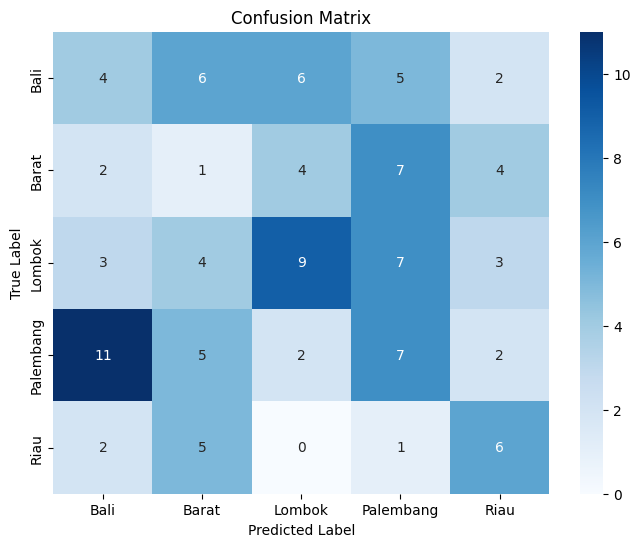

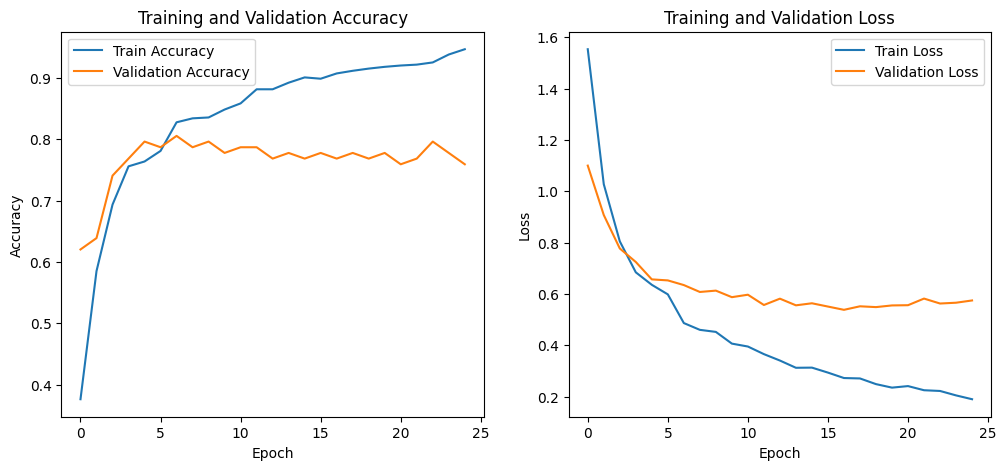

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 1. Evaluasi performa pada data validasi
val_loss, val_acc = model.evaluate(valid_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

# 2. Prediksi kelas validasi
valid_generator.reset()  # Pastikan mulai dari batch pertama
Y_pred = model.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Label sebenarnya
y_true = valid_generator.classes

# Nama kelas
class_names = list(valid_generator.class_indices.keys())

# 3. Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# 4. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 5. Visualisasi grafik training dari history (jika ada)
def plot_history(history):
    plt.figure(figsize=(12,5))

    # Akurasi
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

# Panggil fungsi visualisasi
plot_history(history)


In [22]:
# Setelah training model selesai
model.save(r"D:\Project_DIVI\Dataset-1\mobilenetv2_tenun_model.h5")
print("Model berhasil disimpan dalam format .h5")


Model berhasil disimpan dalam format .h5
